In [54]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.prebuilt import ToolNode, tools_condition
from dotenv import load_dotenv

load_dotenv()

True

In [55]:
from langchain_tavily import TavilySearch
tavily_search_tool = TavilySearch(
    max_results=3,
    topic="general",
)

tavily_search_tool.invoke({"query": "What happened at the last wimbledon"})

{'query': 'What happened at the last wimbledon',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.cnn.com/sport/live-news/wimbledon-final-mens-25-07-13-spt',
   'title': 'Wimbledon final highlights: Jannik Sinner beats Carlos Alcaraz - CNN',
   'content': "Wimbledon live updates: Carlos Alcaraz takes on Jannik Sinner in men’s singles final | CNN • **Top tennis stars facing off:** Two-time reigning champion Carlos Alcaraz and world No. 1 Jannik Sinner are locked in a tight Wimbledon men’s singles final. Image 20: Carlos Alcaraz serves to Jannik Sinner early in the match. Image 27: Carlos Alcaraz celebrates after winning the men's final at Roland Garros against Jannik Sinner. Image 40: Jannik Sinner, left, and Carlos Alcaraz will face off in Sunday's Wimbledon final. After defeating Jannik Sinner in a marathon final at Roland Garros five weeks ago, Carlos Alcaraz came into Wimbledon arguably looking like the player to beat.",
   'score': 0.3

In [56]:
tools=[tavily_search_tool]

In [57]:
system_prompt = (
    "You are a knowledgeable and helpful assistant. "
    "Answer the user's question using your own understanding. "
    "If needed, you may also use the available tools to provide a more accurate or detailed response."
)

In [58]:
model=ChatGoogleGenerativeAI(model="gemini-2.0-flash")
model_with_tools=model.bind_tools(tools)

In [59]:
def agent_function(state: MessagesState):
    """Agent Function"""
    user_question = state["messages"] 
    input_question = [system_prompt] + user_question  
    response = model_with_tools.invoke(input_question)

    return {"messages": [response]}

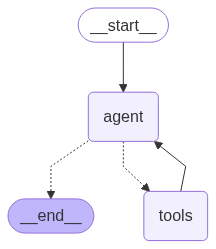

In [60]:
graph_builder= StateGraph(MessagesState)
graph_builder.add_node("agent", agent_function)
graph_builder.add_node("tools", ToolNode(tools=tools))
graph_builder.add_edge(START,"agent")
graph_builder.add_conditional_edges("agent",tools_condition)
graph_builder.add_edge("tools","agent")
graph_builder.add_edge("agent",END)
graph = graph_builder.compile()

graph

In [61]:
response = graph.invoke({"messages": ["what are black holes?"]})
print(response)

{'messages': [HumanMessage(content='what are black holes?', additional_kwargs={}, response_metadata={}, id='eff357c0-c373-4004-bf1d-3d646fa6a314'), AIMessage(content='Black holes are fascinating and mysterious objects in space. Here\'s a breakdown of what they are:\n\n*   **Formation:** They\'re typically formed when massive stars die. When a star runs out of fuel, it can collapse in on itself. If the star is massive enough, this collapse results in a black hole.\n*   **Gravity:** Black holes have incredibly strong gravity. This gravity is so intense that nothing, not even light, can escape once it crosses a certain boundary called the event horizon.\n*   **Event Horizon:** The event horizon is essentially the "point of no return." Anything that crosses it is pulled into the black hole and cannot escape.\n*   **Singularity:** At the center of a black hole is the singularity, a point where all the mass is concentrated. Our current understanding of physics breaks down at the singularity.

In [62]:
response['messages'][-1].content

'Black holes are fascinating and mysterious objects in space. Here\'s a breakdown of what they are:\n\n*   **Formation:** They\'re typically formed when massive stars die. When a star runs out of fuel, it can collapse in on itself. If the star is massive enough, this collapse results in a black hole.\n*   **Gravity:** Black holes have incredibly strong gravity. This gravity is so intense that nothing, not even light, can escape once it crosses a certain boundary called the event horizon.\n*   **Event Horizon:** The event horizon is essentially the "point of no return." Anything that crosses it is pulled into the black hole and cannot escape.\n*   **Singularity:** At the center of a black hole is the singularity, a point where all the mass is concentrated. Our current understanding of physics breaks down at the singularity.\n*   **Detection:** Since light can\'t escape, we can\'t directly see black holes. However, we can detect them by observing their effects on surrounding matter. For 